## Market Basket Analysis
Kadriye Tuba Turkcan Karaca

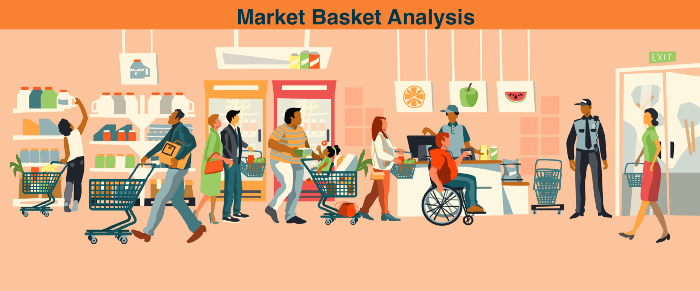

Amazon, Netflix and many other popular companies rely on Market Basket Analysis to produce meaningful product recommendations. Market Basket Analysis is a powerful tool for translating vast amounts of customer transaction and viewing data into simple rules for product promotion and recommendation. 

Objectives:
- Market Basket Analysis using the Apriori algorithm,
- standard and custom metrics,
- association rules, 
- aggregation and pruning, 
- and visualization


###### **What is market basket analysis?**

 - Identify products frequently purchased together.

    Bookstore Ex:
        - Biography and history
        - Fiction and poetry

 - Construct recommendations based on these

    Bookstore Ex:
        - Place biography and history sections together.
        - Keep fiction and history apart

**The use cases of market basket analysis**

- Build Netflix-style recommendations engine.
- Improve product recommendations on an e-commerce store.
- Cross-sell products in a retail setting.
- Improve inventory management.
- Upsell products.

**Market basket analysis**
- Construct association rules
- Identify items frequently purchased together
**Association rules**
- {antecedent}→{consequent}
- {fiction}→{biography}


## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [4]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)


## Dataset

In [5]:
df = pd.read_excel("combined_data9.xlsx")

In [6]:
del df['Unnamed: 0']

In [7]:
del df['new']

In [8]:
df.columns

Index(['fatura_tarihi', 'Customer', 'posta_kodu', 'city', 'country',
       'country_name', 'satis_yapilan_platform', 'satilan_urun', 'adet',
       'birim_fiyat', 'enflasyon', 'ciro', 'day_of_week', 'nakliye',
       'category', 'after_covid', 'before_covid', 'after_war', 'before_war'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39342 entries, 0 to 39341
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fatura_tarihi           39342 non-null  datetime64[ns]
 1   Customer                39342 non-null  object        
 2   posta_kodu              39342 non-null  object        
 3   city                    39342 non-null  object        
 4   country                 39342 non-null  object        
 5   country_name            39342 non-null  object        
 6   satis_yapilan_platform  39342 non-null  object        
 7   satilan_urun            39342 non-null  object        
 8   adet                    39342 non-null  float64       
 9   birim_fiyat             39342 non-null  float64       
 10  enflasyon               39342 non-null  float64       
 11  ciro                    39342 non-null  float64       
 12  day_of_week             39342 non-null  object

In [10]:
df.drop(df[df['category'] == 'versandkosten'].index, inplace = True)

In [11]:
df.shape

(36227, 19)

In [12]:
ebay = df[df['satis_yapilan_platform']=='ebay']

In [13]:
kaufland = df[df['satis_yapilan_platform']=='kaufland']

In [14]:
b2b = df[df['satis_yapilan_platform']=='b2b']

In [15]:
amazon = df[df['satis_yapilan_platform']=='amazon']

In [16]:
platforms = [ebay, kaufland, b2b, amazon]
platforms_string = ['ebay', 'kaufland', 'b2b', 'amazon']

In [18]:
#for i in range(len(platforms)):
    #print(platforms_string[i])
    #print(platforms[i].head())
    #print()

In [19]:
ebay.head()

,fatura_tarihi,Customer,posta_kodu,city,country,country_name,satis_yapilan_platform,satilan_urun,adet,birim_fiyat,enflasyon,ciro,day_of_week,nakliye,category,after_covid,before_covid,after_war,before_war
133,2019-06-03,ID10842,76437,Rastatt,DEU,GERMANY,ebay,gutschein,1.0,0.907563,1.6,0.907563,Monday,3.617214,gutschein,0,1,0,1
574,2019-08-24,ID11175,51519,Odenthal,DEU,GERMANY,ebay,handgemachte naturliche olivenöl seife 150g,1.0,2.327103,1.4,2.327103,Saturday,3.617214,sabun,0,1,0,1
802,2022-03-19,IDKundenID5657,1000,other,ATA,ANTARCTICA,ebay,getrocknete minze - pfefferminze - kuru nane[2...,1.0,2.560000,7.3,2.560000,Saturday,0.000000,kuru_nane,1,0,1,0
1006,2017-12-18,ID10161,51702,Bergneustadt,DEU,GERMANY,ebay,san nicasio-kartoffelchips mit extra natives o...,1.0,2.794393,1.6,2.794393,Monday,3.617214,kartoffelchips,0,1,0,1
1021,2019-08-24,ID11168,60389,Frankfurt am Main,DEU,GERMANY,ebay,dummy artikel,1.0,2.794393,1.4,2.794393,Saturday,3.617214,dummy_artikel_salevali,0,1,0,1


In [20]:
ebay.shape

(1704, 19)

In [21]:
kaufland.shape

(271, 19)

In [22]:
b2b.shape

(6347, 19)

In [23]:
amazon.shape

(21993, 19)

## EDA

In [24]:
# Print number of transactions.
len(amazon['Customer'].unique())

20667

In [25]:
# Print number of items by category
len(amazon['category'].unique())

129

In [26]:
# Print number of items by satilan_urun
len(amazon['satilan_urun'].unique())

1594

## Getting the list of transactions¶



In [43]:
# Recover unique transactions
Invoice = amazon['Customer'].unique()

# Create basket of items for each transaction.
Transactions_product = [list(amazon[amazon['Customer'] == u].satilan_urun.astype(str)) for u in Invoice]
Transactions_category= [list(amazon[amazon['Customer'] == u].category.astype(str)) for u in Invoice]



In [44]:
Transactions_product[0]

['zeytin ana siyah katirli zeytini iri boy - 1000 gr.']

In [45]:
Transactions_category[0]

['zeytin']


## Association rules

 **Association rule**
- Contains antecedent and consequent
    - {health} → {cooking}
- Multi-antecedent rule
    - {humor, travel} → {language}
- Multi-consequent rule
    - {biography} → {history, language}
- Multi-antecedent and consequent rule
     - {biography, non-fiction} → {history, language}

## Difficulty of selecting rules

- Finding useful rules is difficult.
  - Set of all possible rules is large.
  - Most rules are not useful.
  - Must discard most rules.
- What if we restrict ourselves to simple rules?
  - One antecedent and one consequent.
  - Still challenging, even for small dataset.

As the number of items increase the number of rules increases exponentially.
Alt text that describes the graphic
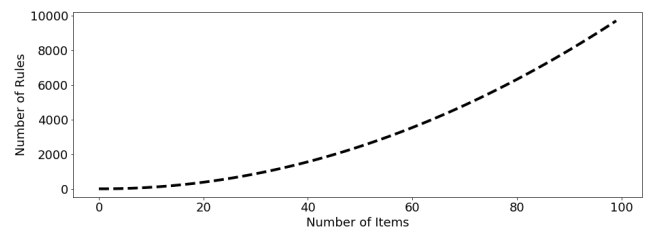


In [46]:
from itertools import permutations

In [47]:
# Extract unique items.
flattened = [item for transaction in Transactions_category for item in transaction]
items = list(set(flattened))



In [48]:
(amazon.category == 'haselnuss_butter').sum()

991

In [49]:
print('# of items:',len(items))
print(list(items))


# of items: 105
['zeytin anakahvaltilik sos (260gr)', 'bohnen', 'lezzo - instantgetränk mit zitronengeschmack (700g)', 'lezzo instantgetränk mit zitronengeschmack 700g', 'cazorla 2,5l', 'wabenhonig', 'kome', 'sabun', 'premium 500 ml', 'kadayif', 'pestil', 'kavurma', 'tuz', 'nar_eksisi', 'tarcin cubuklari 70g', 'cashew', 'karabiber', 'zeytin ana kahvaltilik sos cevizli (260gr)', 'visne', 'fersan', 'tursu', 'findik', 'isot', 'haselnuss_butter', 'kaki', 'salca', 'badem', 'test', 'sumak', 'yag', 'aprikosen', 'cay', 'cerez', 'pergamo paprikaflocken/ milde chili pfeffer/ flocken aus roter gemusepaprika/ bio und ohne zusatzstoffe 200 gr', 'dummy_artikel_salevali', 'kartoffelchips', 'zeytinyagi', 'gesußte nusskernmischung aus der turkei 420g', 'hurma', 'simit', 'isot_paprika_gewurz_ / isot_chili_urfa biber_ aus der turkei[500g (€17,98 pro kilo)]', 'pistazienkugel mit cezerye aus karotten gesunde snacks | sußigkeiten| 500g', 'thé turc 500g', 'bal', 'sultan | sesam samen, geschält sesamsamen wei

In [50]:
pd.options.mode.chained_assignment = None  # default='warn'

In [35]:
amazon.category = amazon.category.str.replace('haselnusse n der schale 2kg','findik')

In [36]:
amazon.category = amazon.category.str.replace('sesamringe/simit/trkische bagel-mediterrane spezialitt/tiefkhlbackware/ hefegebck/ frisch/natrlich vegan/knusprig/4 stck','simit')

In [42]:
amazon.category = amazon.category.str.replace('gursoy findik 400g','findik')
amazon.category = amazon.category.str.replace('haselnuss kg2','findik')
amazon.category = amazon.category.str.replace('haselnusse iin der schale 2g','findik')
amazon.category = amazon.category.str.replace('mandel 1kg','badem')
amazon.category = amazon.category.str.replace('haselnusse mit schale 2kg','findik')
amazon.category = amazon.category.str.replace('bizim tarla recllleri 400gr','recel')
amazon.category = amazon.category.str.replace('haselnuss mit schale 10kg','findik')
amazon.category = amazon.category.str.replace('haselnusse mit schale 2kg','findik')
amazon.category = amazon.category.str.replace('sesamringe/simit/trkische bagel-mediterrane spezialitt/tiefkhlbackware/ hefegebck/ frisch/natrlich vegan/knusprig/8 stck','simit')
amazon.category = amazon.category.str.replace('haselnuss kg2','findik')
amazon.category = amazon.category.str.replace('haselnuss iin der schele 1kg','findik')
amazon.category = amazon.category.str.replace('haselnusse iin der schale 2g','findik')
amazon.category = amazon.category.str.replace('haselnusse mit scgale 2kg','findik')
amazon.category = amazon.category.str.replace('diamant weizenmehl extra type 405, 1 kg','un')
amazon.category = amazon.category.str.replace('gursoy, heselnuss milch creme','haselnuss_butter')
amazon.category = amazon.category.str.replace('haselnusse mit der schale 2kg','findik')
amazon.category = amazon.category.str.replace('haselnuss 2kg','findik')
amazon.category = amazon.category.str.replace('haselnuss mit scharle 2kg','findik')
amazon.category = amazon.category.str.replace('haselnusse n der schale 2kg','findik')
amazon.category = amazon.category.str.replace('gursoy geröstete und gesalzene haselnusse in schale 4x500gr','findik')
amazon.category = amazon.category.str.replace('star nut haselnuss 200gr','findik')
amazon.category = amazon.category.str.replace('mandeln natural -cig badem 1kg','badem')
amazon.category = amazon.category.str.replace('haselnusse mit schale 2 kg','findik')
amazon.category = amazon.category.str.replace('haselnusse in schale 2kg','findik')
amazon.category = amazon.category.str.replace('haselnuss 4kg','findik')
amazon.category = amazon.category.str.replace('pergamo mandeln in schale aus italien 1kg','badem')
amazon.category = amazon.category.str.replace('pergamo mandeln in schale aus italien 1kg','badem')




In [51]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 10920
[('zeytin anakahvaltilik sos (260gr)', 'bohnen'), ('zeytin anakahvaltilik sos (260gr)', 'lezzo - instantgetränk mit zitronengeschmack (700g)'), ('zeytin anakahvaltilik sos (260gr)', 'lezzo instantgetränk mit zitronengeschmack 700g'), ('zeytin anakahvaltilik sos (260gr)', 'cazorla 2,5l'), ('zeytin anakahvaltilik sos (260gr)', 'wabenhonig')]


In [109]:
#rules_category

In [155]:

#for i in range(len(platforms)):
#    print(platforms_string[i])
#    print(platforms[i].groupby('Customer').fatura_tarihi.count().sort_values(ascending=False))
#    print()

In [156]:
# Print number of transactions.
#for i in range(len(platforms)):
#    print(platforms_string[i])
#    print(len(platforms[i]['Customer'].unique()))
#    print()

In [157]:
# Print number of items by category
#for i in range(len(platforms)):
#    print(platforms_string[i])
#    print(len(platforms[i]['category'].unique()))
#    print()

In [158]:
# Print number of items by satilan_urun
#for i in range(len(platforms)):
#    print(platforms_string[i])
#    print(len(platforms[i]['satilan_urun'].unique()))
#    print()

In [159]:
#for i in range(len(platforms)):
    # Recover unique transactions.
#    Invoice = platforms[i]['Customer'].unique()
    # Create basket of items for each transaction.
#    Transactions = [list(platforms[i][platforms[i]['Customer'] == u].category.astype(str)) for u in Invoice]
#    print(platforms_string[i])
#    print(len(Transactions))
#    print()

In [160]:
#for i in range(len(platforms)):
    # Recover unique transactions.
#    Invoice = platforms[i]['Customer'].unique()
    # Create basket of items for each transaction.
#    Transactions = [list(platforms[i][platforms[i]['Customer'] == u].category.astype(str)) for u in Invoice]
#    print(platforms_string[i])
#    print(Transactions[0])
#|    print()

## One-hot encoding transaction data

Here we use a common pipeline for preprocessing data for use in market basket analysis. The first step is to import a pandas DataFrame and select the column that contains transactions. Each transaction in the column will be a string that consists of a number of items, each separated by a comma. The next step is to use a lambda function to split each transaction string into a list, thereby transforming the column into a list of lists. Then we will transform the transactions into a one-hot encoded DataFrame, where each column consists of TRUE and FALSE values that indicate whether an item was included in a transaction.

In [52]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder


In [53]:
# Instantiate transaction encoder.
encoder = TransactionEncoder()

# One-hot encode transactions.
onehot_category = encoder.fit(Transactions_category).transform(Transactions_category)

# Use unique items as column headers.
onehot_category = pd.DataFrame(onehot_category, columns = encoder.columns_)#.drop('nan', axis=1)

# Print onehot header.
onehot_category.head()



,a la rose oda spreyi 375ml,acuka,alarose gul suyu 250ml,antep fistigi,aprikosen,asma,aufstrich/ tomaten-walnuss/ hausgemacht/ vegan/ 100% naturlich/2x260g,backmischung,badem,baklava,bal,bohnen,cashew,cay,"cazorla 2,5l",cerez,chiaöl | kaltgepresst fresh 250 ml,citron - eau de toilette - 400 ml - bouteille 80°,cumin gemahlen | 500g,dummy_artikel_salevali,dut,efepasa 6 geflugelwurstchen / rindfleischanteil / sosis 550g,fersan,findik,fistik,fistik_ezmesi,freshmaker islak mendil-feuchtuch 16stk,gesußte nusskernmischung aus der turkei 420g,glutenfrei gemusesuppe von pergamo (250 gr) / gemusesuppe mit buchweizen/ einfach zuzubereitende suppe/ 100% naturlich/ vegan,haselnuss 3kg,haselnuss_butter,haselnusse 2kg,helva,hurma,incir,isot,"isot_paprika_gewurz_ / isot_chili_urfa biber_ aus der turkei[500g (€17,98 pro kilo)]",...,pulbiber,recel,sabun,saft,salca,sampuan,sarimsak,"sera, mohnpaste, hashas ezmesi 350 gramm",sierra 400 g,simit,sirke,sucuk,"sultan | sesam samen, geschält sesamsamen weiß | 85 g",sumak,tahin,tarcin cubuklari 70g,tarhana,tereyagi,test,thé turc 500g,tursu,tuz,un,visne,vitalgrana omega 5 60 kapseln,vitalgrana premium 200 ml,vitalgrana premium 750 ml,wabenhonig,walnuss,walnusskugel mit atom cezerye aus karotten gesunde snacks | 500g,yag,zeytin,zeytin ana kahvaltilik sos cevizli (260gr),zeytin ana karsik tursu,zeytin anakahvaltilik sos (260gr),zeytin anakahvaltilik sos acili (260gr),zeytinyagi
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
# Instantiate transaction encoder.
encoder = TransactionEncoder()

# One-hot encode transactions.
onehot_product = encoder.fit(Transactions_product).transform(Transactions_product)

# Use unique items as column headers.
onehot_product = pd.DataFrame(onehot_product, columns = encoder.columns_)#.drop('nan', axis=1)

# Print onehot header.
onehot_product.head()



,&#x2705;haselnusscreme 400 g/ 40% haselnuss anteil/ gluten frei haselnuss milch creme palmöl frei/ohne konservierungsstoffe/ ohne farbstoffe/ohne transfettsäuren (1 stuck),&#x2705;haselnusscreme 400 g/ 40% haselnuss anteil/ gluten frei haselnuss milch creme palmöl frei/ohne konservierungsstoffe/ ohne farbstoffe/ohne transfettsäuren (4 stuck vorteil),&#x2705;haselnusscreme 400 g/ 40% haselnuss anteil/ gluten frei haselnuss milch creme palmöl frei/ohne konservierungsstoffe/ ohne farbstoffe/ohne transfettsäuren (8 stuck super händler vorteil),&#x2705;haselnusscreme 400 g/ 40% haselnuss anteil/ gluten frei haselnuss milch creme palmöl frei/ohne konservierungsstoffe/ ohne farbstoffe/ohne transfettsäuren (doppelpack),"1 kg medjool datteri naturale fresco, dimensione medio, scatola di cartone","1 kg medjool datteri naturale fresco, dimensione supremo grande, scatola di cartone","1 kg natrliche medjool datteln supreme gro, frisch, im karton verpackt","1 kg naturel medjool dattes, taille suprême grande",1 kg naturliche frische medjool datteln groß,"1 kg naturliche medjool datteln supreme groß, frisch, im karton verpackt",10 kg. disar schwarzolive aus gemlik,10 mal san nicasio - kartoffelchips - 150g (10er pack sparen sie versandkosten!),10 mal san nicasio - kartoffelchips mit olivenöl - 40g,10 stuck san nicasio kartoffelchips mit extra natives olivenöl 150 gr. (10 stuck pack sparen sie versandkosten!),10 stuck san nicasio kartoffelchips mit extra natives olivenöl und himalayan salz 150 gr. (10 stuck pack sparen sie versandkosten!),10 x 1 ltr. sunich granatapfelsaft 100% fruchtsaft granatapfel grenadine juice,"100% roher 900 g/ bio kastanienhonig, reine imkerabfullung aus spanien, nur eigene bienen",100% roher berg honig / naturbelassen / reine imkerabfullung aus spanien/ höchste qualität/ ohne zusatzstoffe/gluten frei/450 gr,100% roher berg honig 1000 gr/ naturbelassen / reine imker abfullung aus spanien/ höchste qualität/ ohne zusatzstoffe/glutenfrei,100% roher berg honig 400 gr / naturbelassen/ reine imker abfullung aus spanien/ höchste qualität/ ohne zusatzstoffe/glutenfrei,"100% roher bio kastanien honig, reine imkerabfllung aus spanien, nur eigene bienen, kastanienhonig","100% roher bio kastanien honig, reine imkerabfullung aus spanien, nur eigene bienen, kastanienhonig","100% roher bio kastanienhonig, reine imkerabfullung aus spanien, nur eigene bienen","100% roher bio linden honig + bio heidekraut honig, reiner imkerabfullung aus spanien, nur eigene bienen, lindenhonig, heidekrauthonig","100% roher bio linden honig, reine imkerabfllung aus spanien, nur eigene bienen, lindenhonig","100% roher bio linden honig, reine imkerabfullung aus spanien, nur eigene bienen, lindenhonig","100% roher bio lindenhonig + bio heidekrauthonig, reiner imkerabfullung aus spanien, nur eigene bienen","100% roher bio lindenhonig, reine imkerabfllung aus spanien, nur eigene bienen","100% roher bio lindenhonig, reine imkerabfullung aus spanien, nur eigene bienen",100% roher bio mountainhonig,"100% roher bio mountainhonig, reine imkerabfllung, nur eigene bienen","100% roher bio mountainhonig, reine imkerabfullung aus spanien, nur eigene bienen","100% roher bio mountainhonig, reine imkerabfullung, nur eigene bienen","100% roher bio rosmarin-honig, reine imkerabfullung aus spanien, nur eigene bienen","100% roher bio thymianhonig, reine imkerabfullung aus spanien, nur eigene bienen","100% roher bio wald honig (bosque forest), reine imkerabfullung aus spanien, nur eigene bienen","100% roher bio zitronen-honig, reine imkerabfllung aus spanien, nur eigene bienen",...,walnusskugel mit atom cezerye aus karotten gesunde snacks | 500g,"weidorn marmelade/ 65% fruchtanteil/ / 100% natrlich / hausgemacht/ ohne zusatzstoffe /vegan, gluten-und laktose frei / 430gr",weinblätter in salzlake/ asma yapragi/ naturlich / vegan/ gluten-und laktose frei / feinkost/ hausgemacht / 800g,"weißdorn marmelade/ 65% fruchtanteil/ / 100% naturlich / hausgemacht/ ohne zusatzstoffe /vegan

## Metrics and pruning

- A **metric** is a measure of performance for rules.
    - {humor} → {poetry}
        - 0.81
    - {fiction} → {travel}
        - 0.23
- **Pruning** is the use of metrics to discard rules.
    - Retain: {humor} → {poetry}
    - Discard: { fiction} → {travel}

**The simplest metric**

- The support metric measures the share of transactions that contain an itemset.

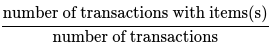

In [55]:
# Compute the support
support_category = onehot_category.mean()
support_category = pd.DataFrame(support_category, columns=['support']).sort_values('support',ascending=False)

# Print the support
support_category.head()



,support
walnuss,0.097934
findik,0.090966
hurma,0.081870
nar_eksisi,0.068225
baklava,0.064838


In [56]:
support_category.describe()


,support
count,105.000000
mean,0.009651
std,0.020082
min,0.000048
25%,0.000048
50%,0.000484
75%,0.009242
max,0.097934


In [57]:
# Compute the support
support_product = onehot_product.mean()
support_product = pd.DataFrame(support_product, columns=['support']).sort_values('support',ascending=False)

# Print the support
support_product.head()



,support
dummy artikel,0.040548
granatapfelsirup 100 % granatapfel konzentrat (nar eskisi) 330 ml von fersan (1er pack),0.020758
fersan nar eksisi 330 ml,0.020177
"saftige ajwa al madinah-datteln, 1 kg, geschenkbox, kajoor aus madina",0.009290
agaven dicksaft,0.007887


In [58]:
support_product.describe()

,support
count,1594.000000
mean,0.000648
std,0.001629
min,0.000048
25%,0.000048
50%,0.000145
75%,0.000629
max,0.040548


## Confidence and lift

- When support is misleading

    - Milk and bread frequently purchased together.
        - Support: {Milk} → {Bread}
    - Rule is not informative for marketing.
        - Milk and bread are both independently popular items.

- **The confidence metric**

    - Can improve over support with additional metrics.
    - Adding confidence provides a more complete picture.
    - Confidence gives us the probability we will purchase Y given we have purchased X.
    - The probability of purchasing both milk and coffee does not change if we condition on purchasing milk. Purchasing milk tells us nothing about purchasing coffee.
    
     

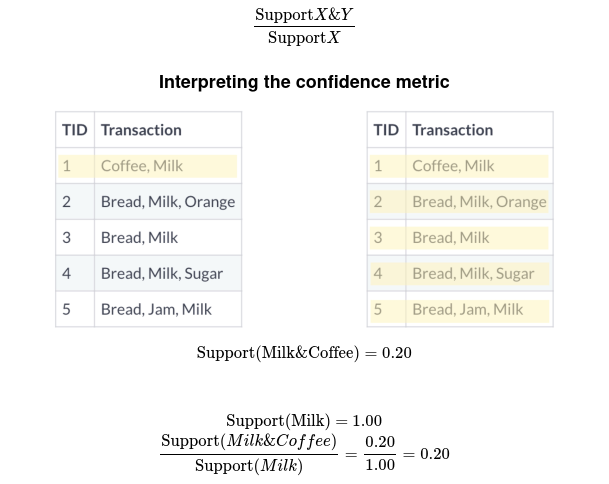


- **The lift metric**

    - Lift provides another metric for evaluating the relationship between items.
        - Numerator: Proportion of transactions that contain X and Y.
        - Denominator: Proportion if X and Y are assigned randomly and independently to transactions.
        
        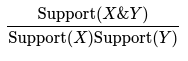

    - Lift >1 tells us 2 items occur in transactions together more often than we would expect based on their individual support values.       This means the relationship is unlikely to be explained by random chance. This natural threshold is convenient for filtering purposes.

    - Lift <1 tells us 2 items are paired together less frequently in transactions than we would expect if the pairings occurred by random chance.

## Recommending food with support

In [59]:
# Compute support for walnuss and findik
supportWF = np.logical_and(onehot_category['walnuss'], onehot_category['findik']).mean()

# Compute support for walnuss and hurma
supportWH = np.logical_and(onehot_category['walnuss'], onehot_category['hurma']).mean()

# Compute support for findik and hurma
supportFH = np.logical_and(onehot_category['findik'], onehot_category['hurma']).mean()

# Print support values
print("walnuss and findik: %.3f" % supportWF)
print("walnuss and hurma: %.3f" % supportWH)
print("findik and hurma: %.3f" % supportFH)

walnuss and findik: 0.001
walnuss and hurma: 0.000
findik and hurma: 0.000


## Computing the support metric

To identify frequently purchased items, we'll compute support at the item-level. And second, we check whether the rule {findik} → {hurma} has a support of over 0.05.

In [60]:
# Add findik+hurma column to the DataFrame onehot
onehot_category['findik+hurma'] = np.logical_and(onehot_category['findik'], onehot_category['hurma'])

# Compute the support
support = onehot_category.mean()
val = support.loc['findik+hurma']

# Print the support values
print(f'findik+hurma support = {val}')

findik+hurma support = 4.83863163497363e-05


In [61]:
support.loc['findik+hurma']

4.83863163497363e-05

## Refining support with confidence



Now we will use the direction of the relationship. Should we use findik to promote hurma or hurma to promote findik?

We  compute the confidence metric, which has a direction, unlike support. We'll compute it for both {findik} → {hurma} and {hurma} → {findik}.

In [62]:
# Compute support for  findik and hurma
supportFH = np.logical_and(onehot_category['findik'], onehot_category['hurma']).mean()

# Compute support for findik
supportF = onehot_category['findik'].mean()
print(supportF)
# Compute support for hurma
supportH = onehot_category['hurma'].mean()
print(supportH)

# Compute confidence for both rules
confidenceFF = supportFH / supportF
confidenceFH = supportFH / supportH

# Print results
print('findik = {0:.4f}, hurma = {1:.4f}'.format(confidenceFF, confidenceFH))

0.09096627473750424
0.08186964726375381
findik = 0.0005, hurma = 0.0006


Even though the support is identical for the two association rules, the confidence is higher for hurma -> findik.
So, Use hurma to promote findik, since the rule has a higher confidence metric. 

## Further refinement with lift

To confirm that this is a meaningful relationship, we use another metric,lift.

If lift is less than 1
, this means that findik and hurma are paired together less frequently than we would expect if the pairings occurred by random chance.

In [63]:
# Compute lift
liftFH = supportFH / (supportF * supportH)

# Print lift
print("Lift: %.2f" % liftFH)


Lift: 0.01


As it turns out, lift is less than 1.0. This does not give us good confidence to say that the association rule we recommended did not arise by random chance.

## Leverage and Conviction
- **The leverage metric**
    - Leverage also builds on support. 
    - Leverage is similar to lift, but easier to interpret.
    - Leverage lies in −1 and +1 range. Lift ranges from 0 to infinity.
    
    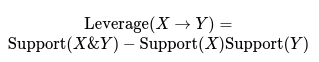
    
    
 - **The conviction metric**

    Conviction is also built using support.
    More complicated and less intuitive than leverage. 
    
    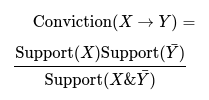

## Computing conviction

We will check if we are able to compute conviction for the rule {walnuss} → {findik}, so we can decide whether to place the items next to each other on the company's website.

In [64]:
# Compute support for walnuss AND findik
supportWF = np.logical_and(onehot_category['walnuss'], onehot_category['findik']).mean()

# Compute support for walnuss
supportW = onehot_category['walnuss'].mean()

# Compute support for NOT findik
supportnF = 1.0 - onehot_category['findik'].mean()

# Compute support for walnuss and NOT findik
supportWnF = supportW - supportWF

# Compute and print conviction for walnuss -> findik
convictionWF = supportW * supportnF / supportWnF
print("Conviction: %.2f" % convictionWF)


Conviction: 0.92


Notice that the value of conviction was smaller than 1, suggesting that the rule if walnuss then findik is not supported.

In [65]:
# Compute support for zeytin AND peynir
supportZP = np.logical_and(onehot_category['zeytin'], onehot_category['peynir']).mean()

# Compute support for zeytin
supportZ = onehot_category['zeytin'].mean()

# Compute support for NOT peynir
supportnP = 1.0 - onehot_category['peynir'].mean()

# Compute support for zeytin and NOT peynir
supportZnP = supportZ - supportZP

# Compute and print conviction for zeytin -> peynir
convictionZP = supportZ * supportnP / supportZnP
print("Conviction: %.2f" % convictionZP)


Conviction: 1.00


Notice that the value of conviction is 1, suggesting that the rule if zeytin then peynir is supported.

## Computing conviction with a function

If we are able to compute conviction for every pair of food items in the grocery-store dataset, then we can use that information to decide which food items to locate closer together on the website.


In [66]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

## Computing leverage with a function

In [67]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA


## Promoting food with conviction¶

In [68]:
# Compute conviction for walnuss -> findik and findik -> walnuss
convictionWF = conviction(onehot_category['walnuss'], onehot_category['findik'])
convictionFW = conviction(onehot_category['findik'], onehot_category['walnuss'])

# Compute conviction for walnuss -> hurma and hurma -> walnuss
convictionWH = conviction(onehot_category['walnuss'], onehot_category['hurma'])
convictionHW = conviction(onehot_category['hurma'], onehot_category['walnuss'])

# Compute conviction for findik -> hurma and hurma -> findik
convictionFH = conviction(onehot_category['findik'], onehot_category['hurma'])
convictionHF = conviction(onehot_category['hurma'], onehot_category['findik'])

# Print results
print('findik -> walnuss: ', convictionFW)
print('walnuss -> findik: ', convictionWF)
print()
print('findik -> hurma: ', convictionFH)
print('hurma -> findik: ', convictionHF)

findik -> walnuss:  0.9132386967858327
walnuss -> findik:  0.9194823887712601

findik -> hurma:  0.9186189798531894
hurma -> findik:  0.9095712969510011


## Association and Dissociation

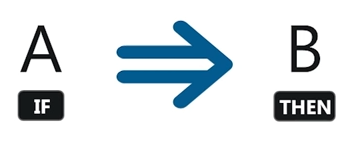

**Zhang's metric**
- Introduced by Zhang(2000) Takes values between −1 and +1
- Value of +1 indicates perfect association
- Value of −1 indicates perfect dissociation

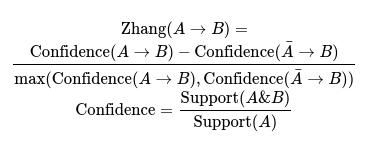

- Using only support

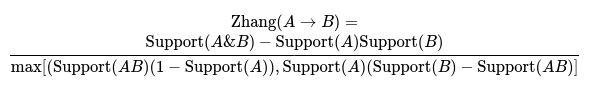

## Computing association and dissociation

In [83]:
#antecedent

In [69]:
# Compute the support of walnuss and findik
supportw = onehot_category['walnuss'].mean()
supportf = onehot_category['findik'].mean()

# Compute the support of both food items
supportwf = np.logical_and(onehot_category['walnuss'], onehot_category['findik']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportwf - supportw*supportf
denominator = max(supportwf*(1-supportw), supportw*(supportf-supportwf))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)



-0.8859169236794437


It had a negative value for Zhang's metric, indicating that the two food items are dissociated.

In [70]:
# Compute the support of zeytin and peynir
supportz = onehot_category['zeytin'].mean()
supportp = onehot_category['peynir'].mean()

# Compute the support of both food items
supportzp = np.logical_and(onehot_category['zeytin'], onehot_category['peynir']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportzp - supportz*supportp
denominator = max(supportzp*(1-supportz), supportz*(supportp-supportzp))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)



-1.0


It had a negative value for Zhang's metric, indicating that the two food items are dissociated.

In [71]:
# Compute the support of zeytin and peynir
supportz = onehot_category['zeytin'].mean()
supporty = onehot_category['zeytinyagi'].mean()

# Compute the support of both food items
supportzy = np.logical_and(onehot_category['zeytin'], onehot_category['zeytinyagi']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportzy - supportz*supporty
denominator = max(supportzy*(1-supportz), supportz*(supporty-supportzy))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)



-1.0


In [72]:
# Define a function to compute Zhang's metric
def zhang(antecedent, consequent):
    # Compute the support of each book
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Compute the support of both books
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Return Zhang's metric
    return numerator / denominator

In [73]:
# Create rules DataFrame
rules_category = pd.DataFrame(rules, columns=['antecedents','consequents'])


In [107]:
rules_category

,antecedents,consequents
0,zeytin anakahvaltilik sos (260gr),bohnen
1,zeytin anakahvaltilik sos (260gr),lezzo - instantgetränk mit zitronengeschmack (...
2,zeytin anakahvaltilik sos (260gr),lezzo instantgetränk mit zitronengeschmack 700g
3,zeytin anakahvaltilik sos (260gr),"cazorla 2,5l"
4,zeytin anakahvaltilik sos (260gr),wabenhonig
...,...,...
10915,acuka,cumin gemahlen | 500g
10916,acuka,kozalak
10917,acuka,pergamo zimtstangen/ ganz cinnamon/ hoch aroma...
10918,acuka,zeytin ana karsik tursu


In [104]:
rules_category['antecedents'][0]

'zeytin anakahvaltilik sos (260gr)'

In [97]:
onehot_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20667 entries, 0 to 20666
Columns: 106 entries, a la rose oda spreyi 375ml to findik+hurma
dtypes: bool(106)
memory usage: 2.1 MB


In [100]:
onehot_category

,a la rose oda spreyi 375ml,acuka,alarose gul suyu 250ml,antep fistigi,aprikosen,asma,aufstrich/ tomaten-walnuss/ hausgemacht/ vegan/ 100% naturlich/2x260g,backmischung,badem,baklava,bal,bohnen,cashew,cay,"cazorla 2,5l",cerez,chiaöl | kaltgepresst fresh 250 ml,citron - eau de toilette - 400 ml - bouteille 80°,cumin gemahlen | 500g,dummy_artikel_salevali,dut,efepasa 6 geflugelwurstchen / rindfleischanteil / sosis 550g,fersan,findik,fistik,fistik_ezmesi,freshmaker islak mendil-feuchtuch 16stk,gesußte nusskernmischung aus der turkei 420g,glutenfrei gemusesuppe von pergamo (250 gr) / gemusesuppe mit buchweizen/ einfach zuzubereitende suppe/ 100% naturlich/ vegan,haselnuss 3kg,haselnuss_butter,haselnusse 2kg,helva,hurma,incir,isot,"isot_paprika_gewurz_ / isot_chili_urfa biber_ aus der turkei[500g (€17,98 pro kilo)]",...,recel,sabun,saft,salca,sampuan,sarimsak,"sera, mohnpaste, hashas ezmesi 350 gramm",sierra 400 g,simit,sirke,sucuk,"sultan | sesam samen, geschält sesamsamen weiß | 85 g",sumak,tahin,tarcin cubuklari 70g,tarhana,tereyagi,test,thé turc 500g,tursu,tuz,un,visne,vitalgrana omega 5 60 kapseln,vitalgrana premium 200 ml,vitalgrana premium 750 ml,wabenhonig,walnuss,walnusskugel mit atom cezerye aus karotten gesunde snacks | 500g,yag,zeytin,zeytin ana kahvaltilik sos cevizli (260gr),zeytin ana karsik tursu,zeytin anakahvaltilik sos (260gr),zeytin anakahvaltilik sos acili (260gr),zeytinyagi,findik+hurma
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20662,False,False,False

In [112]:
for itemset in rules:
    #print(onehot_category[itemset[0]])
    # Extract the antecedent and consequent columns
    antecedent = onehot_category[itemset[0]]
    #print(antecedent)
    consequent = onehot_category[itemset[1]]

In [113]:

# Define an empty list for metrics
zhangs, conv, lev, antec_supp, cons_supp, suppt, conf, lft = [], [], [], [], [], [], [], []

# Loop over lists in itemsets
for itemset in rules:
    # Extract the antecedent and consequent columns
    antecedent = onehot_category[itemset[0]]
    consequent = onehot_category[itemset[1]]
    
    antecedent_support = onehot_category[itemset[0]].mean()
    consequent_support = onehot_category[itemset[1]].mean()
    support = np.logical_and(onehot_category[itemset[0]], onehot_category[itemset[1]]).mean()
    confidence = support / antecedent_support
    lift = support / (antecedent_support * consequent_support)
    
    # Complete metrics and append it to the list
    antec_supp.append(antecedent_support)
    cons_supp.append(consequent_support)
    suppt.append(support)
    conf.append(confidence)
    lft.append(lift)
    lev.append(leverage(antecedent, consequent))
    conv.append(conviction(antecedent, consequent))
    zhangs.append(zhang(antecedent, consequent))
    
# Store results
rules_category['antecedent support'] = antec_supp
rules_category['consequent support'] = cons_supp
rules_category['support'] = suppt
rules_category['confidence'] = conf
rules_category['lift'] = lft
rules_category['leverage'] = lev
rules_category['conviction'] = conv
rules_category['zhang'] = zhangs

# Print results
rules_category.sort_values('zhang',ascending=False).head()



<ipython-input-66-e6dfd18b1d75>:15: RuntimeWarning: divide by zero encountered in double_scalars
  return supportA * supportnC / supportAnC


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
3582,dummy_artikel_salevali,lezzo orange - instantgetränk mit orangenaroma...,0.042338,0.000048,0.000048,0.001143,23.619429,0.000046,1.001096,1.0
3538,dummy_artikel_salevali,lezzo - instantgetränk mit zitronengeschmack (...,0.042338,0.000048,0.000048,0.001143,23.619429,0.000046,1.001096,1.0
9504,kuru,isot_paprika_gewurz_ / isot_chili_urfa biber_ ...,0.005468,0.000048,0.000048,0.008850,182.893805,0.000048,1.008880,1.0
254,lezzo - instantgetränk mit zitronengeschmack (...,lezzo orange - instantgetränk mit orangenaroma...,0.000048,0.000048,0.000048,1.000000,20667.000000,0.000048,inf,1.0
4338,pistazienkugel mit cezerye aus karotten gesund...,walnusskugel mit atom cezerye aus karotten ges...,0.000048,0.000048,0.000048,1.000000,20667.000000,0.000048,inf,1.0


In [114]:
rules_category.describe()


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
count,10920.000000,10920.000000,10920.000000,10920.000000,10920.000000,1.092000e+04,1.092000e+04,10920.000000
mean,0.009651,0.009651,0.000003,0.001298,9.549018,-8.661592e-05,inf,-0.985166
std,0.019987,0.019987,0.000032,0.031528,419.457951,4.476081e-04,NaN,0.145360
min,0.000048,0.000048,0.000000,0.000000,0.000000,-8.017814e-03,9.020661e-01,-1.000000
25%,0.000048,0.000048,0.000000,0.000000,0.000000,-4.738661e-06,9.907582e-01,-1.000000
50%,0.000484,0.000484,0.000000,0.000000,0.000000,-5.033657e-07,9.996613e-01,-1.000000
75%,0.009242,0.009242,0.000000,0.000000,0.000000,-2.575359e-08,9.999516e-01,-1.000000
max,0.097934,0.097934,0.001113,1.000000,20667.000000,3.950554e-04,inf,1.000000


In [115]:
rules_category.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10920 non-null  object 
 1   consequents         10920 non-null  object 
 2   antecedent support  10920 non-null  float64
 3   consequent support  10920 non-null  float64
 4   support             10920 non-null  float64
 5   confidence          10920 non-null  float64
 6   lift                10920 non-null  float64
 7   leverage            10920 non-null  float64
 8   conviction          10920 non-null  float64
 9   zhang               10920 non-null  float64
dtypes: float64(8), object(2)
memory usage: 853.2+ KB


## Filtering with support and conviction



Our objective is to perform multi-metric filtering on the dataset to identify potentially useful rules.

In [116]:
# Select the subset of rules with antecedent support greater than 0.05
rules_filtered = rules_category[rules_category['antecedent support'] > 0.05]

# Select the subset of rules with a consequent support greater than 0.01
rules_filtered = rules_category[rules_category['consequent support'] > 0.01]

# Select the subset of rules with a conviction greater than 1.01
rules_filtered = rules_category[rules_category['conviction'] > 1.01]

# Select the subset of rules with a lift greater than 1.0
rules_filtered = rules_category[rules_category['lift'] > 1.0]

# Print remaining rules
print(f'# of rules = {len(rules_category)}')
print(f'# of rules after filtering = {len(rules_filtered)}')
rules_filtered

# of rules = 10920
# of rules after filtering = 72


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
16,zeytin anakahvaltilik sos (260gr),zeytin ana kahvaltilik sos cevizli (260gr),0.000048,0.000097,0.000048,1.000000,10333.500000,0.000048,inf,0.999952
156,bohnen,fistik_ezmesi,0.002371,0.003387,0.000048,0.020408,6.025364,0.000040,1.017376,0.836017
174,bohnen,antep fistigi,0.002371,0.012871,0.000048,0.020408,1.585622,0.000018,1.007694,0.370210
241,lezzo - instantgetränk mit zitronengeschmack (...,dummy_artikel_salevali,0.000048,0.042338,0.000048,1.000000,23.619429,0.000046,inf,0.957708
254,lezzo - instantgetränk mit zitronengeschmack (...,lezzo orange - instantgetränk mit orangenaroma...,0.000048,0.000048,0.000048,1.000000,20667.000000,0.000048,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
9556,kuru,recel,0.005468,0.002032,0.000048,0.008850,4.354614,0.000037,1.006878,0.774594
9701,recel,yag,0.002032,0.009580,0.000048,0.023810,2.485209,0.000029,1.014576,0.598836
9715,recel,bal,0.002032,0.042435,0.000097,0.047619,1.122170,0.000011,1.005443,0.109091
9737,recel,sirke,0.002032,0.010403,0.000048,0.023810,2.288704,0.000027,1.013733,0.564218


## Using multi-metric filtering to cross-promote food items

In [117]:
# Set the threshold for Zhang's rule to 0.65
rules_filtered = rules_filtered[rules_filtered['zhang'] > 0.65]

# Print rule
print(f'# of rules after filtering = {8598 - len(rules_filtered)}')
rules_filtered

# of rules after filtering = 8556


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
16,zeytin anakahvaltilik sos (260gr),zeytin ana kahvaltilik sos cevizli (260gr),0.000048,0.000097,0.000048,1.000000,10333.500000,0.000048,inf,0.999952
156,bohnen,fistik_ezmesi,0.002371,0.003387,0.000048,0.020408,6.025364,0.000040,1.017376,0.836017
241,lezzo - instantgetränk mit zitronengeschmack (...,dummy_artikel_salevali,0.000048,0.042338,0.000048,1.000000,23.619429,0.000046,inf,0.957708
254,lezzo - instantgetränk mit zitronengeschmack (...,lezzo orange - instantgetränk mit orangenaroma...,0.000048,0.000048,0.000048,1.000000,20667.000000,0.000048,inf,1.000000
633,kome,pestil,0.003677,0.001016,0.000145,0.039474,38.847744,0.000141,1.040038,0.977854
1046,pestil,kome,0.001016,0.003677,0.000145,0.142857,38.847744,0.000141,1.162376,0.975249
1063,pestil,kaki,0.001016,0.009242,0.000048,0.047619,5.152580,0.000039,1.040296,0.806742
1768,zeytin ana kahvaltilik sos cevizli (260gr),zeytin anakahvaltilik sos (260gr),0.000097,0.000048,0.000048,0.500000,10333.500000,0.000048,1.999903,1.000000
1792,zeytin ana kahvaltilik sos cevizli (260gr),salca,0.000097,0.019209,0.000048,0.500000,26.028967,0.000047,1.961581,0.961674
1801,zeytin ana kahvaltilik sos cevizli (260gr),dummy_artikel_salevali,0.000097,0.042338,0.000048,0.500000,11.809714,0.000044,1.915324,0.915413


## Aggregation

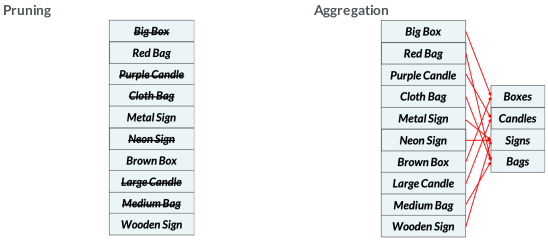

In [118]:
# Convert words to a list of words
def convert_str(string):
    lst = list(string.split(' '))
    return lst


In [119]:
# Select the column headers for nar_eksisi items
nar_eksisi_headers = []
for i in onehot_product.columns:
    wrd_lst = convert_str(str(i).lower())
    if 'nar_eksisi' in wrd_lst:
        nar_eksisi_headers.append(i)

In [120]:
# Select columns of nar_eksisi items
nar_eksisi_columns = onehot_product[nar_eksisi_headers]

# Perform aggregation of nar_eksisi items into nar_eksisi category
nar_eksisis = nar_eksisi_columns.sum(axis = 1) >= 1.0

# Print support for signs
print('Share of nar_eksisis: %.5f' % nar_eksisis.mean())



Share of nar_eksisis: 0.00000


In [121]:
def aggregate(item):
    # Select the column headers for sign items
    item_headers = []
    for i in onehot_product.columns:
        wrd_lst = convert_str(str(i).lower())
        if item in wrd_lst:
            item_headers.append(i)

    # Select columns of sign items
    item_columns = onehot_product[item_headers]

    # Return category of aggregated items
    return item_columns.sum(axis = 1) >= 1.0

In [122]:
# Aggregate items for the honig, haselnusse, and hurma categories  
honigs = aggregate('honig')
haselnusses = aggregate('haselnus')
hurmas = aggregate('hurma')

print('Share of Honig: %.3f' % honigs.mean())
print('Share of Haselnuss: %.3f' % haselnusses.mean())
print('Share of Hurmas: %.3f' % hurmas.mean())

Share of Honig: 0.019
Share of Haselnuss: 0.000
Share of Hurmas: 0.000


## The Apriori algorithm

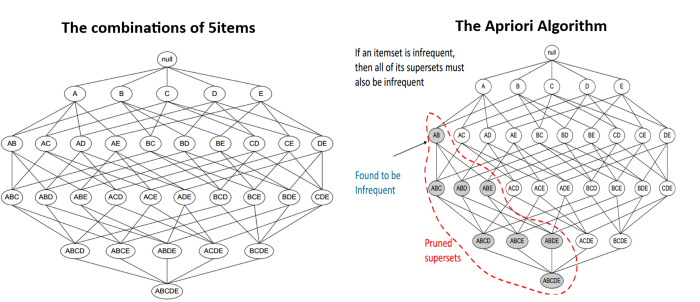

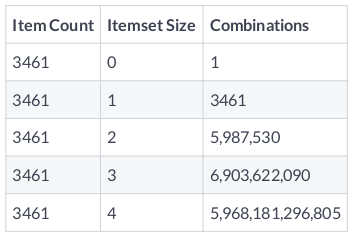

### Counting itemsets

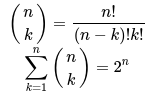

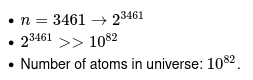  .

- **Reducing the number of itemsets**

    - Not possible to consider all itemsets.Not even possible to enumerate them.
    - How do we remove an itemset without even evaluating it? Could set maximum k

        value.
    - Apriori algorithm offers alternative. Doesn't require enumeration of all itemsets. Sensible rule for pruning.

- **The Apriori principle**

    Apriori principle.
    - Subsets of frequent sets are frequent.
    - Retain sets known to be frequent.
    - Prune sets not known to be frequent.

- Ex:

    - honig = Infrequent
        -> {honig, nar_Eksisi} = Infrequent
    - {honig, nar_eksisi} = Infrequent
        -> {honig, nar_eksisi, haselnuss} = Infrequent
    - {honig, nar_eksisi, haselnuss} = Infrequent
        -> {honig, nar_eksisi, haselnuss, hurma} = Infrequent


## Identifying frequent itemsets with Apriori

We'll apply the Apriori algorithm to prune the itemsets using a minimum value of support and a maximum item number threshold.

In [123]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

In [125]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets_category = apriori(onehot_category, 
                            min_support = 0.05, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets_category

,support,itemsets
0,0.064838,(baklava)
1,0.090966,(findik)
2,0.081870,(hurma)
3,0.063434,(kestane)
4,0.068225,(nar_eksisi)
5,0.097934,(walnuss)


In [126]:
# For products Compute frequent itemsets using the Apriori algorithm
frequent_itemsets_product = apriori(onehot_product, 
                            min_support = 0.05, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets_product

,support,itemsets


## Selecting a support threshold

Here all of the itemsets we identified contain only one item.we check whether it would be possible to use a less restrictive rule and to generate more itemsets, possibly including those with multiple items.

. We check three different values for support, each time checking how many additional itemsets are generated.



In [127]:
# Compute frequent itemsets using a support of 0.03 and length of 3
frequent_itemsets_0 = apriori(onehot_category, min_support = 0.03, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1 = apriori(onehot_category, min_support = 0.04, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2 = apriori(onehot_category, min_support = 0.05, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_0),len(frequent_itemsets_1), len(frequent_itemsets_2))

12 11 6


In [141]:
# Compute frequent itemsets using a support of 0.03 and length of 3
frequent_itemsets_0 = apriori(onehot_category, min_support = 0.03, 
                            max_len = 2, use_colnames = True)

# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1 = apriori(onehot_category, min_support = 0.04, 
                            max_len = 2, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2 = apriori(onehot_category, min_support = 0.05, 
                            max_len = 2, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_0),len(frequent_itemsets_1), len(frequent_itemsets_2))

12 11 6


In [142]:
frequent_itemsets_0

,support,itemsets
0,0.064838,(baklava)
1,0.042435,(bal)
2,0.035612,(cay)
3,0.042338,(dummy_artikel_salevali)
4,0.090966,(findik)
5,0.044806,(haselnuss_butter)
6,0.081870,(hurma)
7,0.063434,(kestane)
8,0.068225,(nar_eksisi)
9,0.042870,(pekmez)


In [143]:
frequent_itemsets_1

,support,itemsets
0,0.064838,(baklava)
1,0.042435,(bal)
2,0.042338,(dummy_artikel_salevali)
3,0.090966,(findik)
4,0.044806,(haselnuss_butter)
5,0.081870,(hurma)
6,0.063434,(kestane)
7,0.068225,(nar_eksisi)
8,0.042870,(pekmez)
9,0.042338,(wabenhonig)


In [144]:
frequent_itemsets_2

,support,itemsets
0,0.064838,(baklava)
1,0.090966,(findik)
2,0.081870,(hurma)
3,0.063434,(kestane)
4,0.068225,(nar_eksisi)
5,0.097934,(walnuss)


In [132]:
# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1_p = apriori(onehot_product, min_support = 0.04, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2_p = apriori(onehot_product, min_support = 0.05, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1_p), len(frequent_itemsets_2_p))

1 0


In [133]:
frequent_itemsets_1_p

,support,itemsets
0,0.040548,(dummy artikel)


### Basic Apriori results pruning

- Apriori prunes itemsets.
  - Applies minimum support threshold.
  - Modi ed version can prune by number of items.
  - Doesn't tell us about association rules.
- Association rules.
  - Many more association rules than itemsets.
  - {honig, haselnuss}: honig -> haselnuss OR haselnuss -> honig.

### How to compute association rules

- Computing rules from Apriori results.
  - Difficult to enumerate for high n and k
  - Could undo itemset pruning by Apriori.

- Reducing number of association rules.
  - mlxtend module offers means of pruning association rules.
  - association_rules() takes frequent items, metric, and threshold.


## Generating association rules

Now, we'll determine what association rules can be mined from these itemsets.

In [134]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules


In [138]:
frequent_itemsets_0

,support,itemsets
0,0.064838,(baklava)
1,0.042435,(bal)
2,0.035612,(cay)
3,0.042338,(dummy_artikel_salevali)
4,0.090966,(findik)
5,0.044806,(haselnuss_butter)
6,0.081870,(hurma)
7,0.063434,(kestane)
8,0.068225,(nar_eksisi)
9,0.042870,(pekmez)


In [136]:
rules_0 = association_rules(frequent_itemsets_0, 
                            metric = "support", 
                            min_threshold = 0.001)


In [139]:
rules_0 = association_rules(frequent_itemsets_0, 
                            metric = "lift", 
                            min_threshold = 1)


In [140]:
rules_0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [135]:

# Compute all association rules for frequent_itemsets_0
rules_0 = association_rules(frequent_itemsets_0, 
                            metric = "support", 
                            min_threshold = 0.001)

# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                            min_threshold = 0.001)

# Compute all association rules for frequent_itemsets_1
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = "support", 
                            min_threshold = 0.002)

# Print the number of association rules generated
print(len(rules_0), len(rules_1), len(rules_2))


0 0 0


## Pruning with lift

Values greater than 1 indicate that items co-occur more than we would expect if they were independently distributed across transactions.

In [217]:
# Import the association rules function
from mlxtend.frequent_patterns import association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot_category, min_support = 0.03, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                            min_threshold = 1.0)

# Print association rules
rules.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   antecedents         0 non-null      object
 1   consequents         0 non-null      object
 2   antecedent support  0 non-null      object
 3   consequent support  0 non-null      object
 4   support             0 non-null      object
 5   confidence          0 non-null      object
 6   lift                0 non-null      object
 7   leverage            0 non-null      object
 8   conviction          0 non-null      object
dtypes: object(9)
memory usage: 0.0+ bytes


In [218]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


## Pruning with confidence

In [146]:
# Import the association rules function
from mlxtend.frequent_patterns import apriori, association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot_category, min_support = 0.03, 
                            max_len = 2, use_colnames = True)

# Compute all association rules using confidence
rules = association_rules(frequent_itemsets, 
                            metric = "confidence", 
                            min_threshold = 0.4)

# Print association rules
rules.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   antecedents         0 non-null      object
 1   consequents         0 non-null      object
 2   antecedent support  0 non-null      object
 3   consequent support  0 non-null      object
 4   support             0 non-null      object
 5   confidence          0 non-null      object
 6   lift                0 non-null      object
 7   leverage            0 non-null      object
 8   conviction          0 non-null      object
dtypes: object(9)
memory usage: 0.0+ bytes


In [220]:
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


## Visualizing itemset support

In [148]:
# Apply the apriori algorithm
#frequent_itemsets = apriori(onehot_category, min_support=0.15, use_colnames=True, max_len=2)

# Recover the association rules
rules = association_rules(frequent_itemsets_0)

rules.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   antecedents         0 non-null      object
 1   consequents         0 non-null      object
 2   antecedent support  0 non-null      object
 3   consequent support  0 non-null      object
 4   support             0 non-null      object
 5   confidence          0 non-null      object
 6   lift                0 non-null      object
 7   leverage            0 non-null      object
 8   conviction          0 non-null      object
dtypes: object(9)
memory usage: 0.0+ bytes


In [149]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 720x432 with 0 Axes>

In [150]:
amazon.category.value_counts()

walnuss                                                                      2170
findik                                                                       1903
hurma                                                                        1780
baklava                                                                      1445
nar_eksisi                                                                   1440
                                                                             ... 
dut                                                                             1
sierra 400 g                                                                    1
haselnusse 2kg                                                                  1
vitalgrana premium 200 ml                                                       1
pergamo zimtstangen/ ganz cinnamon/ hoch aromatisch/ naturprodukt - 80 gr       1
Name: category, Length: 105, dtype: int64

In [151]:
#Separating transactions for amazon
mybasket = (amazon
          .groupby(['Customer', 'category'])['adet']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Customer'))

In [152]:
#viewing transaction basket
mybasket.head()

category,a la rose oda spreyi 375ml,acuka,alarose gul suyu 250ml,antep fistigi,aprikosen,asma,aufstrich/ tomaten-walnuss/ hausgemacht/ vegan/ 100% naturlich/2x260g,backmischung,badem,baklava,bal,bohnen,cashew,cay,"cazorla 2,5l",cerez,chiaöl | kaltgepresst fresh 250 ml,citron - eau de toilette - 400 ml - bouteille 80°,cumin gemahlen | 500g,dummy_artikel_salevali,dut,efepasa 6 geflugelwurstchen / rindfleischanteil / sosis 550g,fersan,findik,fistik,fistik_ezmesi,freshmaker islak mendil-feuchtuch 16stk,gesußte nusskernmischung aus der turkei 420g,glutenfrei gemusesuppe von pergamo (250 gr) / gemusesuppe mit buchweizen/ einfach zuzubereitende suppe/ 100% naturlich/ vegan,haselnuss 3kg,haselnuss_butter,haselnusse 2kg,helva,hurma,incir,isot,"isot_paprika_gewurz_ / isot_chili_urfa biber_ aus der turkei[500g (€17,98 pro kilo)]",...,pulbiber,recel,sabun,saft,salca,sampuan,sarimsak,"sera, mohnpaste, hashas ezmesi 350 gramm",sierra 400 g,simit,sirke,sucuk,"sultan | sesam samen, geschält sesamsamen weiß | 85 g",sumak,tahin,tarcin cubuklari 70g,tarhana,tereyagi,test,thé turc 500g,tursu,tuz,un,visne,vitalgrana omega 5 60 kapseln,vitalgrana premium 200 ml,vitalgrana premium 750 ml,wabenhonig,walnuss,walnusskugel mit atom cezerye aus karotten gesunde snacks | 500g,yag,zeytin,zeytin ana kahvaltilik sos cevizli (260gr),zeytin ana karsik tursu,zeytin anakahvaltilik sos (260gr),zeytin anakahvaltilik sos acili (260gr),zeytinyagi
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID10004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ID10005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ID10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ID10008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID10009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)

## Training Model

In [154]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

In [155]:
my_frequent_itemsets

,support,itemsets
0,0.090966,(findik)
1,0.081870,(hurma)
2,0.097934,(walnuss)


In [156]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [157]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


 References
 https://goldinlocks.github.io/Market-Basket-Analysis-in-Python/ 